In [ ]:
#### Importing required packages and libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split    # For Splitting the dataset
from sklearn.linear_model import LinearRegression # Importing Linear Regressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
get_ipython().run_line_magic('matplotlib', 'inline')
import statsmodels.api as sm
from numpy import linalg
from linearmodels.iv import IV2SLS

ModuleNotFoundError: ignored

In [ ]:
pip install linearmodels

     |████████████████████████████████| 1.5 MB 4.1 MB/s 
     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 9.8 MB 32.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from numpy import linalg
from numpy import random

In [ ]:
def out(data):
    sorted (data)
    q1,q3= np.percentile(data, [25,75])
    iqr= q3-q1
    lb = q1 -(1.5 * iqr) 
    ub = q3 +(1.5 * iqr) 
    data[data > ub] = ub
    data[data < lb] = lb
    return (data)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving carMPG.csv to carMPG.csv


In [ ]:
%prun df = pd.read_csv("8. Car price prediction.txt")
df

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
df.isnull().sum()[df.isnull().sum()>0] ## Columns having null values


Series([], dtype: int64)

In [ ]:
#### Data Exploration ####
print("Replacing ? in HorsePower with NaNs...\n")

df.replace({'?':np.nan}, inplace = True)

Replacing ? in HorsePower with NaNs...



In [ ]:
df.isnull().sum()[df.isnull().sum()>0]


Horsepower    6
dtype: int64

In [ ]:
## Imputing null values with mean values

df = df.dropna()

In [ ]:
#converting Data type
df.Horsepower = df.Horsepower.astype(int)
df.Cylinders = df.Cylinders.astype(object)
#df.Origin = df.Origin.astype(object)
#df.Model_year = df.Model_year.astype(object)


In [ ]:
### Rechecking the summaries
print("Structure of the data..\n")
print(df.info())
print("\nSummary of the data..\n")
print(df.describe(include = 'all'))


Structure of the data..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB
None

Summary of the data..

       Unnamed: 0        mpg        cyl        disp          hp       drat  \
count          32  32.000000  32.000000   32.000000   32.000000  32.000000   
unique         32        NaN        NaN         NaN

In [ ]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
0,8.0,8,307.0,130,3504,12.0,2015,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,2015,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,2015,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,2015,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,2015,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,2003,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,2003,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,2003,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,2003,1,ford ranger


In [ ]:
#Split
df["Car_Name"]= df["Car_Name"].str.split(" ", n = 1, expand = True)


ValueError: ignored

In [ ]:
df.Car_Name.head()

0    chevrolet
1        buick
2     plymouth
3          amc
4         ford
Name: Car_Name, dtype: object

In [ ]:
#replacing

df['Car_Name'].replace(to_replace=['chevrolet', 'chevroelt','chevy'], value='chevrolet', regex = True, inplace=True)

df['Car_Name'].replace(
    to_replace=['toyota', 'toyouta'], value='toyota', regex = True, inplace=True)

df['Car_Name'].replace(
    to_replace=['mazda', 'maxda'], value='mazda', regex = True, inplace=True)

df['Car_Name'].replace(
    to_replace=['mercedes', 'mercedes-benz'], value='mercedes', regex = True, inplace=True)

df['Car_Name'].replace(
    to_replace=['vw', 'vokswagen','volkswagen'], value='volkswagen', regex = True, inplace=True)

df['Car_Name'].replace(
    to_replace=['ford', 'capri','mercury'], value='ford', regex = True, inplace=True)

df['Car_Name'].replace(
    to_replace=['hi','honda'], value='honda', regex = True, inplace=True)

In [ ]:
df.Car_Name.describe()

count      392
unique      27
top       ford
freq        60
Name: Car_Name, dtype: object

In [ ]:
### Checking for outliers
df.quantile(np.linspace(0,1,11))

,MPG,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin
0.0,8.00,68.0,46.0,1613.0,8.00,2003.0,1.0
0.1,14.00,90.0,67.0,1990.0,12.00,2004.0,1.0
0.2,16.00,98.0,72.0,2155.0,13.42,2005.0,1.0
0.3,18.00,112.0,80.0,2303.0,14.03,2007.0,1.0
0.4,20.00,122.0,88.0,2583.2,14.80,2008.0,1.0
0.5,22.75,151.0,93.5,2803.5,15.50,2009.0,1.0
0.6,25.00,225.0,100.0,3113.4,16.00,2010.0,1.0
0.7,27.47,250.0,110.0,3428.5,16.70,2012.0,2.0
0.8,30.98,305.0,140.0,3820.8,17.70,2013.0,2.8
0.9,34.19,350.0,157.7,4277.6,19.00,2014.0,3.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f23c5cb2bd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f23c5cc1c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f23c5cc8cd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f23c5cc8790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f23c5cc1210>,
  <matplotlib.lines.Line2D at 0x7f23c5cc1750>]}

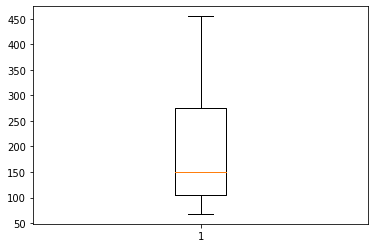

In [ ]:
plt.boxplot(df.Displacement)








{'boxes': [<matplotlib.lines.Line2D at 0x7f23c56aaed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f23c56b3f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f23c56baf90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f23c56baa50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f23c56b34d0>,
  <matplotlib.lines.Line2D at 0x7f23c56b3a10>]}

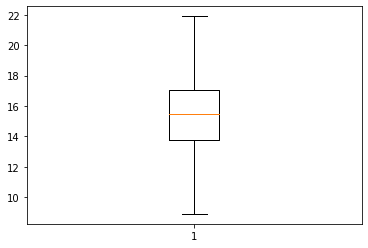

In [ ]:
plt.boxplot(df.Acceleration)





In [ ]:
df.Acceleration= out(df.Acceleration)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


{'boxes': [<matplotlib.lines.Line2D at 0x7f23c5595b10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f23c559bb90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f23c55a2bd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f23c55a2690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f23c559b110>,
  <matplotlib.lines.Line2D at 0x7f23c559b650>]}

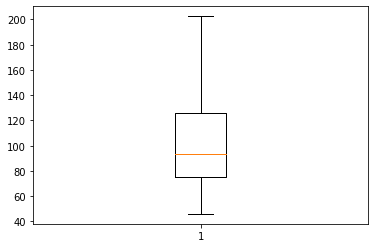

In [ ]:
plt.boxplot(df.Horsepower)




In [ ]:
df.Horsepower= out(df.Horsepower)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


{'boxes': [<matplotlib.lines.Line2D at 0x7f23c5508b50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f23c550fbd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f23c5518c10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f23c55186d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f23c550f150>,
  <matplotlib.lines.Line2D at 0x7f23c550f690>]}

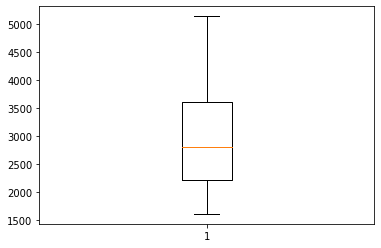

In [ ]:
plt.boxplot(df.Weight)

In [ ]:
finaldata = pd.get_dummies(df)

In [ ]:
finaldata.columns

Index(['MPG', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model_year', 'Origin', 'Cylinders_3', 'Cylinders_4', 'Cylinders_5',
       'Cylinders_6', 'Cylinders_8', 'Car_Name_amc', 'Car_Name_audi',
       'Car_Name_bmw', 'Car_Name_buick', 'Car_Name_cadillac',
       'Car_Name_chevrolet', 'Car_Name_chrysler', 'Car_Name_datsun',
       'Car_Name_dodge', 'Car_Name_fiat', 'Car_Name_ford', 'Car_Name_honda',
       'Car_Name_mazda', 'Car_Name_mercedes', 'Car_Name_nissan',
       'Car_Name_oldsmobile', 'Car_Name_opel', 'Car_Name_peugeot',
       'Car_Name_plymouth', 'Car_Name_pontiac', 'Car_Name_renault',
       'Car_Name_saab', 'Car_Name_subaru', 'Car_Name_toyota',
       'Car_Name_triumph', 'Car_Name_volkswagen', 'Car_Name_volvo'],
      dtype='object')

In [ ]:
finaldata

,MPG,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Car_Name_amc,Car_Name_audi,Car_Name_bmw,Car_Name_buick,Car_Name_cadillac,Car_Name_chevrolet,Car_Name_chrysler,Car_Name_datsun,Car_Name_dodge,Car_Name_fiat,Car_Name_ford,Car_Name_honda,Car_Name_mazda,Car_Name_mercedes,Car_Name_nissan,Car_Name_oldsmobile,Car_Name_opel,Car_Name_peugeot,Car_Name_plymouth,Car_Name_pontiac,Car_Name_renault,Car_Name_saab,Car_Name_subaru,Car_Name_toyota,Car_Name_triumph,Car_Name_volkswagen,Car_Name_volvo
0,8.0,307.0,130.0,3504,12.0,2015,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165.0,3693,11.5,2015,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150.0,3436,11.0,2015,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,16.0,304.0,150.0,3433,12.0,2015,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140.0,3449,10.5,2015,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790,15.6,2003,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
394,44.0,97.0,52.0,2130,21.9,2003,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
395,32.0,135.0,84.0,2295,11.6,2003,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
396,28.0,120.0,79.0,2625,18.6,2003,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
### Dividing the data into X(pedictors) and Y(Predicted)
y = finaldata['MPG']
X = finaldata.drop('MPG', axis=1)

In [ ]:
### Splitting into test and train dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=10)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     Displacement  Horsepower  ...  Car_Name_volkswagen  Car_Name_volvo
281         200.0        85.0  ...                    0               0
325          90.0        48.0  ...                    1               0
272         151.0        85.0  ...                    0               0
37          232.0       100.0  ...                    0               0
379          98.0        70.0  ...                    0               0
..            ...         ...  ...                  ...             ...
375         105.0        74.0  ...                    1               0
322          86.0        65.0  ...                    0               0
15          198.0        95.0  ...                    0               0
127         232.0       100.0  ...                    0               0
267         134.0        95.0  ...                    0               0

[262 rows x 38 columns]
     Displacement  Horsepower  ...  Car_Name_volkswagen  Car_Name_volvo
243          80.0       110.0  ...     

In [ ]:
#### Modelling begins here
LR = LinearRegression() # Create linear regression object
# Train the model using the training sets
LR.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(LR.score(X_train,y_train))
print (LR.score(X_test,y_test))


0.8629365210938428
0.8191290015486792


In [ ]:
### Scoring on the train Dataset
### This is on the train dataset
cross_val_score(LR, X_train, y_train, cv=4)

array([0.75940442, 0.84022006, 0.7920022 , 0.85201867])

In [ ]:
### Scoring on the test Dataset
### This is on the test dataset
cross_val_score(LR, X_test, y_test, cv=4)


array([0.79901555, 0.83285114, 0.74668362, 0.76073493])

In [ ]:
### Building the Optimal Model Using Backward Elimination

Model_OLS = sm.OLS(endog = y, exog = X).fit()
A=Model_OLS.summary()
Model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     61.86
Date:                Tue, 14 Sep 2021   Prob (F-statistic):          1.02e-130
Time:                        08:39:23   Log-Likelihood:                -974.01
No. Observations:                 392   AIC:                             2022.
Df Residuals:                     355   BIC:                             2169.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Displacement            0.0177      0.008      2.280      0.023       0.002       0.033
Horsepower             -0.0517      0.016     -3.265      0.001      -0.083      -0.021
Weight                 -0.0050      0.001     -7.123      0.000      -0.006      -0.004
Acceleration           -0.0841      0.107     -0.788      0.431      -0.294       0.126
Model_year             -0.7066      0.052    -13.626      0.000      -0.809      -0.605
Origin                 -0.1002      1.705     -0.059      0.953      -3.453       3.252
Cylinders_3          1227.1973     88.118     13.927      0.000    1053.898    1400.496
Cylinders_4          1235.0694     87.816     14.064      0.000    1062.364    1407.774
Cylinders_5          1235.3421     87.676     14.090      0.000    1062.912    1407.772
Cylinders_6          1231.5839     87.819     14.024      0.000    1058.873    1404.294
Cylinders_8          1232.9643     87.800     14.043      0.000    1060.292    1405.637
Car_Name_amc          226.0193     16.256     13.903      0.000     194.048     257.990
Car_Name_audi         228.1323     16.496     13.830      0.000     195.690     260.574
Car_Name_bmw          226.9572     16.582     13.687      0.000     194.346     259.569
Car_Name_buick        227.0506     16.114     14.091      0.000     195.361     258.741
Car_Name_cadillac     228.9831     16.105     14.218      0.000     197.311     260.656
Car_Name_chevrolet    226.1625     16.197     13.963      0.000     194.308     258.017
Car_Name_chrysler     225.5395     16.029     14.071      0.000     194.016     257.063
Car_Name_datsun       230.8207     16.588     13.915      0.000     198.198     263.443
Car_Name_dodge        226.9888     16.157     14.049      0.000     195.213     258.765
Car_Name_fiat         229.0145     16.516     13.866      0.000     196.532     261.497
Car_Name_ford         225.7198     16.200     13.933      0.000     193.860     257.580
Car_Name_honda        229.7158     16.477     13.941      0.000     197.310     262.121
Car_Name_mazda        230.5011     16.458     14.006      0.000     198.134     262.868
Car_Name_mercedes     228.9815     16.465     13.907      0.000     196.600     261.363
Car_Name_nissan       230.9754     16.546     13.960      0.000     198.436     263.515
Car_Name_oldsmobile   227.6204     16.096     14.141      0.000     195.965     259.276
Car_Name_opel         226.6867     16.551     13.696      0.000     194.137     259.237
Car_Name_peugeot      228.1491     16.473     13.850      0.000     195.751     260.547
Car_Name_plymouth     227.9659     16.245     14.033      0.000     196.018     259.914
Car_Name_pontiac      228.0959     16.161     14.114      0.000     196.312     259.880
Car_Name_renault      228.8497     16.511     13.861      0.000     196.378     261.321
Car

In [ ]:
w=5
Model_WLS = sm.WLS(y, X, weights=1./(w**2)).fit()

print(Model_WLS.summary())


                            WLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.863
Model:                            WLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     61.86
Date:                Tue, 14 Sep 2021   Prob (F-statistic):          1.02e-130
Time:                        08:41:41   Log-Likelihood:                -974.01
No. Observations:                 392   AIC:                             2022.
Df Residuals:                     355   BIC:                             2169.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Displacement            0.0177    

In [ ]:




iv = IV2SLS(dependent='MPG',
            exog=X,
            endog=y,
            instruments=carMPG  ).fit(cov_type='unadjusted')

NameError: ignored

In [ ]:
#We can do it manually, here I am using while loop since the same process is to be repeated
# Creating an Iterating model 


while max([float(x[4].data) for x in A.tables[1] if A.tables[1].index(x)>0])  > 0 :
    
    #taking out the P-values
    P_value = [float(x[4].data) for x in A.tables[1] if A.tables[1].index(x)>0]
    #assigning max p value
    max_sig_level = max(P_value)
    #finding index of max p value
    ind = P_value.index(max_sig_level)
    #dropping the col
    X = X.drop(X.columns[ind], axis=1)
    
    ### Splitting into test and train dataset
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=10)
    
    #fitting the model
    LR.fit(X_train, y_train)
    
    A = sm.OLS(endog = y, exog = X).fit().summary()
    


print(A)


X.columns


print(LR.score(X_train,y_train))
print (LR.score(X_test,y_test))


### Scoring on the train Dataset
### This is on the train dataset
cross_val_score(LR, X_train, y_train, cv=3)


### Scoring on the test Dataset
### This is on the test dataset
cross_val_score(LR, X_test, y_test, cv=3)


                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     175.8
Date:                Fri, 13 Nov 2020   Prob (F-statistic):          1.69e-155
Time:                        04:07:38   Log-Likelihood:                -967.27
No. Observations:                 392   AIC:                             1965.
Df Residuals:                     377   BIC:                             2024.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Horsepower         -0.0476      0.010     

array([0.80786663, 0.89434455, 0.8432454 ])